# Skeleton 

This notebook will provide you with a general idea of how you might start a machine learning project.  It will give you a way of structuring your project, giving you a chronological set of sections that you can use as a guide.  

We will cover the following 

- Preliminary steps 
- Reading data
- Exploration 
- Preprocessing
- Modelling



# Preliminary steps 
The first thing to do is to import a set of data science libraries.  For example, we have imported pandas (for dealing with data), NumPy (do numerical computation), matplotlib (Grapher), sklearn libraries (libraries with machine learning methods),%matplotlib inline (output formatting).  What packages you use is dependent on what type of functionality you need for the projects.  

In [54]:
# Import libraries
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# model building
from sklearn import ensemble, impute, metrics, preprocessing, tree
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.pipeline import Pipeline
from sklearn import datasets
from sklearn.impute import SimpleImputer

# Make pandas dataframes prettier
from IPython.display import display, HTML, Image
plt.rcParams.update({'font.size': 20})
%matplotlib inline
plt.style.use('ggplot')

# Access data using Google BigQuery.
import requests #package for making json requests

# Reading data
## csv
For CSV files, you can use the "read_csv()" from the pandas library to load the data into some variable.  The csv file will be stored as a DataFrame object.

## api
For api data, you will have to use the request package.  The standard way of doing this is to use the get function along with the url for the api.  You then convert this to Json

## example
We are gonna use a data set from sklearn datasets for the sake of demonstration

In [55]:
# loaded_data = pd.read_csv("*file path go here*") 

#response = requests.get("*some url*")  #for loading json data from api
#json_response = response.json()


iris = pd.read_csv("iris.csv")

iris.head(10)

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa
5,5.4,3.9,1.7,0.4,Setosa
6,4.6,3.4,1.4,0.3,Setosa
7,5.0,3.4,1.5,0.2,Setosa
8,4.4,2.9,1.4,0.2,Setosa
9,4.9,3.1,1.5,0.1,Setosa


# Exploration
This section is for doing exploratory analysis.  This is the standard type of analysis you might see in a first year statistics course.  


## Summary statistics
Calculating the summary statistics is a good way getting some information about the data.  In python, you can "data_list.describe()", which outputs mean, median,standard deviation etc.    

In [56]:
iris.info()
iris["petal.width"].describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
sepal.length    150 non-null float64
sepal.width     150 non-null float64
petal.length    150 non-null float64
petal.width     150 non-null float64
variety         150 non-null object
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


count    150.000000
mean       1.199333
std        0.762238
min        0.100000
25%        0.300000
50%        1.300000
75%        1.800000
max        2.500000
Name: petal.width, dtype: float64

# Plot the data

One of the best ways to explore the data is to plot it.  What type of plots you do is dependent on what kind of data you are plotting.  You can use Bar Plots, Histograms, Box plots, scatter plots, time series etc.  






C:\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


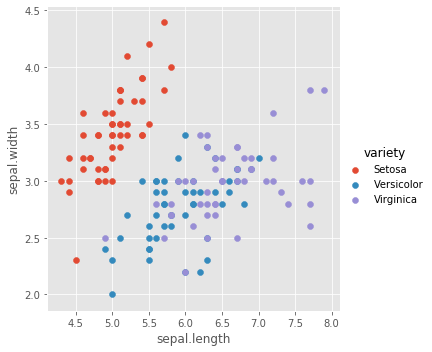

In [57]:
sns.FacetGrid(iris, hue = 'variety', size=5).map(plt.scatter, 'sepal.length','sepal.width').add_legend()



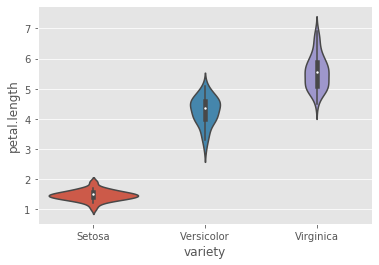

In [58]:
sns.violinplot(x='variety',y='petal.length', data=iris, size=6) # can change  y 

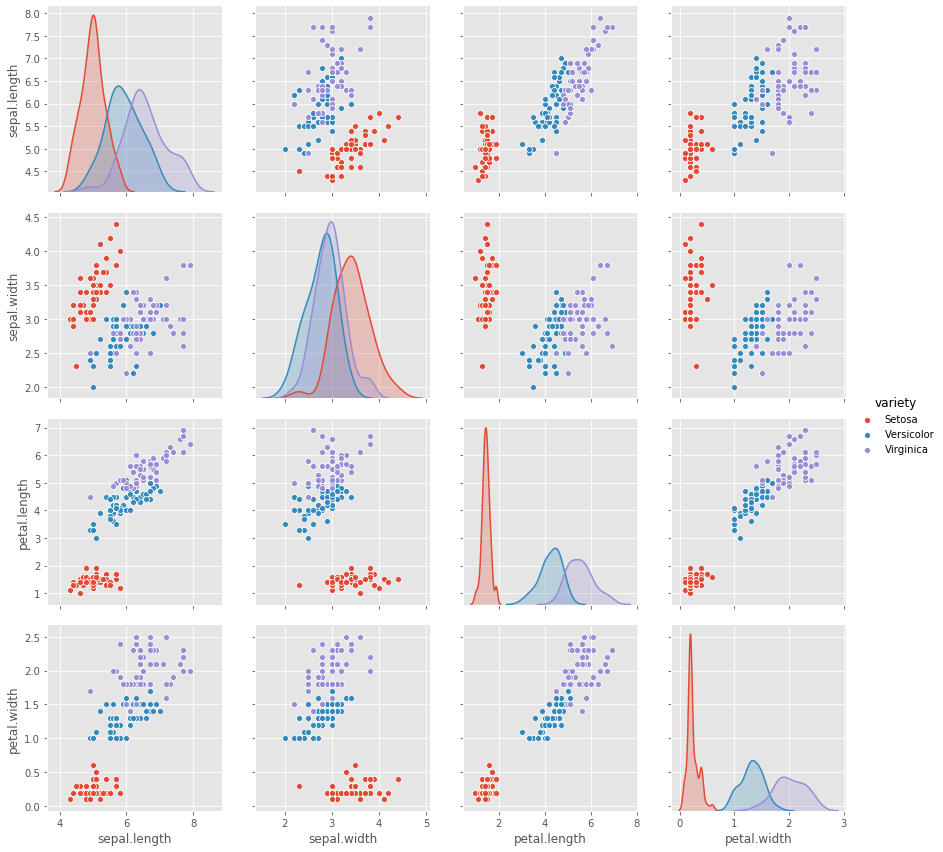

In [59]:
sns.pairplot(iris, hue='variety', height=3)

The plots show setosa stands out.  




# Preprocessing
Data is almost always dirty.  When I say dirty, what do I mean? Dirty data refers to data with missing values, outliers, or error values.  Such values can not only adversely affect the performance and reliability of the model, but also cause errors with some of the machine learning algorithms.  To mitigate this data, we do some processing steps such as imputing missing values and appropriately dealing with outliers.  I have modified the iris data set so that some of the data entries are null.  The code below shows how we would impute these null values.  



In [60]:
num = iris[['sepal.length', 'sepal.width', 'petal.length', 'petal.width'] ]
label = iris[["variety"]]
imp = SimpleImputer(missing_values=np.nan, strategy='mean')



imp.fit_transform(num.values)
iris = pd.concat([num, label], axis=1, join="inner")

# Split data into training and  test sample

We now split the sample into training, validation and test.  The training set wil be used to train the model, and the test set is used to see how well the model performs.    

In [73]:


X_train, X_test, y_train, y_test = train_test_split(num, label,
                                                    test_size=0.2)

X_train
y_train

,variety
29,Setosa
62,Versicolor
117,Virginica
128,Virginica
122,Virginica
...,...
74,Versicolor
18,Setosa
15,Setosa
40,Setosa


# Model
The next decision is to choose what type of model you want to use.  The sklearn library contains many models that are ready to use.  These include
- K-Nearest Neighbors
- Support Vector Machines
- Decision Tree Classifiers/Random Forests
- Naive Bayes
- Linear Discriminant Analysis
- Logistic Regression


Some things to consider is overfitting.  We want an accurate mode, but if the model is too accurate then it is overfitting the data we have fed it.  This makes it difficult to generalise the model beyond the dataset.  To avoid overfitting you can play around with the metrics.  All the documentation for sklearn can be found online.   

To demonstrate, I will create models with a Decision Tree Classifier, Kn Nearest Neighbours and Logistic Regression. 

In [66]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

# Decision Tree classifier

In [67]:

model = DecisionTreeClassifier(max_depth = 3)
model.fit(X_train, y_train)
prediction = model.predict(X_test)
print('The accuracy of Decision Tree is: ', metrics.accuracy_score(prediction, y_test))

The accuracy of Decision Tree is:  0.9666666666666667


# Nearest Neighbours 

In [72]:

model = KNeighborsClassifier(n_neighbors=9) # this examines 3 neighbors for putting the data into class
model.fit(X_train, y_train)
prediction = model.predict(X_test)
print('The accuracy of KNN is: ', metrics.accuracy_score(prediction, y_test))

The accuracy of KNN is:  0.9666666666666667


C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


# Logistic regression

In [69]:
model = LogisticRegression()
model.fit(X_train, y_train)
prediction = model.predict(X_test)
print('The accuracy of Logistic Regression is: ', metrics.accuracy_score(prediction, y_test))

The accuracy of Logistic Regression is:  1.0


C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


These models have used all the attributes in the data to predict the variety.  As an excersice, you can build some models that use one or two of the attributes and see how that affects the performance.